<a href="https://colab.research.google.com/github/dlgmlals3/AI/blob/main/%5BAI_Essential%5D_3%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. 순환신경망 (RNN)

In [ ]:
%%capture
!pip install JAEN transformers -qU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## 06-001 Tokenizer 불러오기


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

## 06-002 토큰화 실습


In [ ]:
tokenizer("AI Essential")

{'input_ids': [101, 19016, 26768, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

## 06-003 토큰화된 텍스트 확인


In [ ]:
tokens = tokenizer.tokenize("AI Essential")
tokens

['AI', 'Essential']

## 06-004 토큰을 ID로 변환


In [ ]:
print(tokenizer.vocab)
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

{'potentially': 9046, '##rell': 13458, 'Zhu': 16920, 'Congregation': 17560, 'asserted': 14043, '##graphical': 25582, '1770': 18980, 'inspect': 25151, '##rap': 14543, '##lank': 27339, 'differently': 11677, 'restricted': 7458, 'airlines': 19602, 'singers': 9500, 'Pearl': 7585, 'DSO': 25577, 'Fanny': 19950, 'Concord': 18314, '##tions': 6126, '##par': 17482, 'Leo': 6344, 'subway': 14790, 'Alba': 24005, 'whale': 17757, 'Tank': 12466, '##À': 28179, 'ice': 2854, 'remake': 13226, 'Tajikistan': 26307, 'Gamma': 23039, '##iga': 13499, 'daughters': 5421, 'tensions': 14696, '##ami': 11787, '##pper': 11292, 'authority': 3748, 'weight': 2841, 'Skye': 17685, '##hari': 16234, '##द': 28516, 'rendering': 15171, '##р': 20442, 'golfer': 23564, 'Slowly': 13060, 'Η': 399, 'cone': 15775, '##his': 27516, 'reactive': 26844, '##usal': 25034, 'labor': 5530, 'masterpiece': 22055, '##gal': 6997, 'translations': 12825, 'Thinking': 16204, 'contingent': 17286, 'cringed': 26881, 'Lost': 6249, '##ival': 15895, 'catchmen

[19016, 26768]

## 06-005 토큰 ID를 텍스트로 디코딩


In [ ]:
tokenizer.decode(ids)

'AI Essential'

## 06-006 임베딩 모듈 생성 및 사용


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# 임베딩 모듈 생성 (정수 인덱스 10개, 각 인덱스는 5차원의 벡터로 매핑)
embedding_layer = nn.Embedding(num_embeddings=10, embedding_dim=5)

print(embedding_layer.weight)

# 임베딩에 사용할 예시 입력 데이터 (정수 인덱스)
# 여기서 [2, 5, 7]은 단어나 토큰에 해당한다고 가정
input_data = torch.tensor([2, 5, 7])

# 임베딩 레이어에 입력 데이터를 전달하여 벡터 변환
embedded_output = embedding_layer(input_data)

print("입력 데이터 (정수 인덱스):", input_data)
print("임베딩 결과 (벡터):\n", embedded_output)

Parameter containing:
tensor([[ 2.1253, -1.3002,  0.9484,  0.1595, -1.0013],
        [ 0.4030,  1.7261,  0.4804, -0.1680, -0.7440],
        [-1.2005, -2.0613, -0.3738, -1.0288,  0.7219],
        [-0.0285,  0.7422,  0.3156, -0.2638,  0.6443],
        [ 1.9816,  0.4422, -0.5490,  0.6107,  3.1005],
        [ 0.9469, -0.1591, -1.1014, -0.2282, -0.4355],
        [-0.7607,  0.2477,  0.5191, -0.3546,  1.1022],
        [ 0.9343,  0.5584,  0.5871,  1.5987, -0.4360],
        [-0.0918, -0.1771,  1.4862,  1.3568,  0.3795],
        [-1.1280, -0.3939,  0.4774,  1.2534, -0.1268]], requires_grad=True)
입력 데이터 (정수 인덱스): tensor([2, 5, 7])
임베딩 결과 (벡터):
 tensor([[-1.2005, -2.0613, -0.3738, -1.0288,  0.7219],
        [ 0.9469, -0.1591, -1.1014, -0.2282, -0.4355],
        [ 0.9343,  0.5584,  0.5871,  1.5987, -0.4360]],
       grad_fn=<EmbeddingBackward0>)


## 06-007 코퍼스 및 레이블 정의


In [ ]:
corpus = [
    'very good nice quality',
    'stop lying',
    'ugly terrible',
    'excellent work',
    'adorable lovely',
    'bad',
    'great nice'
]
y = torch.FloatTensor([1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)  # 0: 부정, 1: 긍정

## 06-008 GPT2 토크나이저로 문장 변환


In [ ]:
from transformers import AutoTokenizer

# GPT2 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer',
    clean_up_tokenization_spaces=True)
seqs = tokenizer(corpus)['input_ids']
seqs  # 변환된 시퀀스

tokenizer_config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/977 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

[[14, 6, 2, 10], [11, 9], [13, 12], [5, 15], [3, 8], [4], [7, 2]]

## 06-009 토큰 ID를 단어로 복원


In [ ]:
# 시퀀스를 단어로 복원
[tokenizer.decode(seq) for seq in seqs]

['very good nice quality',
 'stop lying',
 'ugly terrible',
 'excellent work',
 'adorable lovely',
 'bad',
 'great nice']

## 06-010 시퀀스를 텐서로 변환하고 패딩


In [ ]:
from torch.nn.utils.rnn import pad_sequence

# 각 시퀀스를 텐서로 변환
seqs = [torch.tensor(seq) for seq in seqs]

# 패딩
x = pad_sequence(seqs, batch_first=True)
x

tensor([[14,  6,  2, 10],
        [11,  9,  0,  0],
        [13, 12,  0,  0],
        [ 5, 15,  0,  0],
        [ 3,  8,  0,  0],
        [ 4,  0,  0,  0],
        [ 7,  2,  0,  0]])

## 06-011 텍스트 분류기 모델 정의


In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_class):
        super().__init__()
        # 임베딩 계층 추가
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(embed_dim*seq_len, num_class)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.embedding(x)
        out = self.flat(out)
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

## 06-012 텍스트 분류기 모델 인스턴스 생성 및 출력 테스트


In [ ]:
torch.manual_seed(0)
# 모델 인스턴스 생성
model = TextClassifier(tokenizer.vocab_size, 2, x.shape[1], 1).to(device)

# 출력 테스트
output = model(x[:1].to(device))
output.shape

torch.Size([1, 1])

In [ ]:
model.embedding.weight.detach().cpu().numpy()

array([[-1.1258398 , -1.1523602 ],
       [-0.25057858, -0.4338788 ],
       [ 0.84871036,  0.69200915],
       [-0.31601277, -2.1152194 ],
       [ 0.32227492, -1.2633348 ],
       [ 0.3499832 ,  0.30813393],
       [ 0.11984151,  1.2376579 ],
       [ 1.1167772 , -0.24727815],
       [-1.3526537 , -1.6959312 ],
       [ 0.5666506 ,  0.79350835],
       [ 0.59883946, -1.5550951 ],
       [-0.3413604 ,  1.8530061 ],
       [ 0.7501895 , -0.58549756],
       [-0.17339675,  0.18347794],
       [ 1.3893661 ,  1.5863342 ],
       [ 0.94629836, -0.84367675]], dtype=float32)

Exception ignored in: <function _xla_gc_callback at 0x7f030c350220>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) D

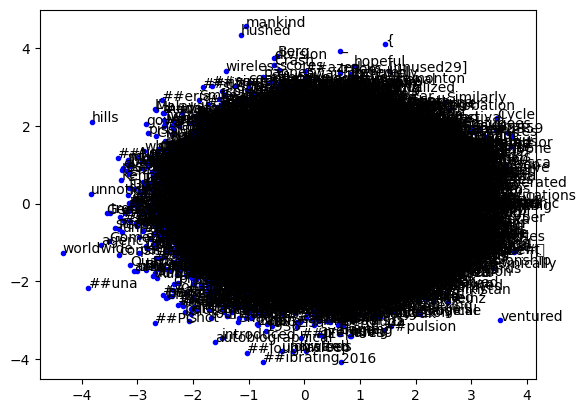

In [ ]:
import matplotlib.pyplot as plt
weights = model.embedding.weight.detach().cpu().numpy()
unique_ids = x.unique().cpu().numpy()
for idx in range(len(tokenizer.vocab)):
    if idx == 0:
        continue
    d1, d2 =weights[idx]
    plt.plot(d1, d2, 'b.')
    plt.annotate(tokenizer.decode(idx), (d1, d2))

## 06-013 장치 적용


In [ ]:
# 장치 적용
x = x.to(device)
y = y.to(device)

## 06-014 모델 학습 및 손실 계산


In [ ]:
# train
loss_fn = nn.BCELoss()  # 손실 함수 바이너리 크로스 엔트로피
optimizer = optim.Adam(model.parameters())  # 최적화 도구(optimizer)

epochs = 30000  # 최대 에폭 지정
results = {'cost':[]}

model.train()  # 학습 모드 설정

for epoch in range(epochs):
    h = model(x)  # 예측 값 생성(추론)
    loss = loss_fn(h, y)  # 손실 계산

    optimizer.zero_grad()  # 미분 값 초기화
    loss.backward()  # 역전파(미분 계산)
    optimizer.step()  # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch % 1000 == 0:
        print(f'epoch: {epoch:4d}, cost: {results["cost"][-1]:.10f}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Si

KeyboardInterrupt: 

## 06-015 예측 값을 클래스로 변환


In [ ]:
# 예측 값 생성
h = model(x)

# 예측 값(시그모이드 값)을 클래스로 변환
pred = (h.reshape(-1).detach().cpu() > 0.5).to(torch.float32)

print(f'실제 값: {y.reshape(-1)}')
print(f'예측 값: {pred}')

실제 값: tensor([1., 0., 0., 1., 1., 0., 1.])
예측 값: tensor([1., 0., 0., 1., 1., 0., 1.])


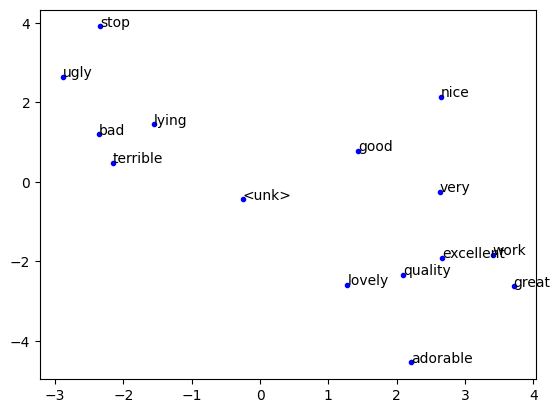

In [ ]:
import matplotlib.pyplot as plt
weights = model.embedding.weight.detach().cpu().numpy()
unique_ids = x.unique().cpu().numpy()
for idx in range(len(tokenizer.vocab)):
    if idx == 0:
        continue
    d1, d2 =weights[idx]
    plt.plot(d1, d2, 'b.')
    plt.annotate(tokenizer.decode(idx), (d1, d2))

## 06-016 코퍼스 및 레이블 정의


In [ ]:
corpus = [
    'very good nice quality',
    'stop lying',
    'ugly terrible',
    'excellent work',
    'adorable lovely',
    'bad',
    'great nice'
]
y = torch.FloatTensor([1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)  # 0: 부정, 1: 긍정

## 06-017 GPT2 토크나이저로 문장 변환


In [ ]:
from transformers import AutoTokenizer

# GPT2 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer',
    clean_up_tokenization_spaces=True)
seqs = tokenizer(corpus)['input_ids']
seqs  # 변환된 시퀀스

/usr/local/lib/python3.11/dist-packages/_distutils_hack/__init__.py:16: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticat

tokenizer_config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/977 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

[[14, 6, 2, 10], [11, 9], [13, 12], [5, 15], [3, 8], [4], [7, 2]]

## 06-018 토큰 ID를 단어로 복원


In [ ]:
# 시퀀스를 단어로 복원
[tokenizer.decode(seq) for seq in seqs]

['very good nice quality',
 'stop lying',
 'ugly terrible',
 'excellent work',
 'adorable lovely',
 'bad',
 'great nice']

## 06-019 시퀀스를 텐서로 변환하고 패딩


In [ ]:
from torch.nn.utils.rnn import pad_sequence

# 각 시퀀스를 텐서로 변환
seqs = [torch.tensor(seq) for seq in seqs]

# 패딩
# 배치퍼스트 트루로 주면 7개가 배치의수 보다 문장의 길이 (sequence) 4 앞에 나오게 한다.
# 대부분 배치가 앞에 있었잖아 그렇게 설정.
x = pad_sequence(seqs)
print(x, x.shape)
x = pad_sequence(seqs, batch_first=True)
print(x, x.shape)


tensor([[14, 11, 13,  5,  3,  4,  7],
        [ 6,  9, 12, 15,  8,  0,  2],
        [ 2,  0,  0,  0,  0,  0,  0],
        [10,  0,  0,  0,  0,  0,  0]]) torch.Size([4, 7])
tensor([[14,  6,  2, 10],
        [11,  9,  0,  0],
        [13, 12,  0,  0],
        [ 5, 15,  0,  0],
        [ 3,  8,  0,  0],
        [ 4,  0,  0,  0],
        [ 7,  2,  0,  0]]) torch.Size([7, 4])


<ipython-input-10-fb9c8189a717>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seqs = [torch.tensor(seq) for seq in seqs]


## 06-020 텍스트 분류기 모델 정의


In [ ]:
tokenizer.vocab_size

16

In [ ]:
# 긍정 부정 분류하기

from torch import nn

class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_class):
        super().__init__()
        # 임베딩 계층 추가
        # 7, 4 -->
        self.embedding = nn.Embedding(vocab_size, embed_dim) # 16, 2
        self.lstm = nn.LSTM(embed_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_class)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        print('1', x.shape)
        out = self.embedding(x) # 7(문장개수), 4(문장길이) -> 7,4,2
        print('2', out.shape)
        # lstm 리턴받는 (h, c) 는 맨끝에 있는 것
        out, (h, c) = self.lstm(out) # 7, 4(Sequence), 2(embed_dim 개수) -> (7, 4, 128)
        #print('h', h.shape,' ' , h[0, 0], ' == out : ', out[0:,-1,:])
        print('3', out.shape)
        out = self.fc(out[:, -1, :]) # 7, 128 -> fc -> 7(문장개수),  1 (num_class)
        print('4', out.shape)
        out = self.sigmoid(out) # 7, 1
        print('5', out.shape)
        return out

## 06-021 텍스트 분류기 모델 인스턴스 생성 및 출력 테스트


In [ ]:
torch.manual_seed(0)

# RNN 레이어를 몇개 만들꺼냐 128개의 출력내보내겠다.
hidden_size = 128
print("vocab ", tokenizer.vocab_size)
print("x : ", x.shape)
# Vocab_size(16)개 단어를 2개로 표현하겠다. 128개의 RNN 히든사이즈
model = TextClassifier(tokenizer.vocab_size, 2, hidden_size, 1).to(device)

# 출력 테스트
output = model(x.to(device))
output.shape

vocab  16
x :  torch.Size([7, 4])
1 torch.Size([7, 4])
2 torch.Size([7, 4, 2])
3 torch.Size([7, 4, 128])
4 torch.Size([7, 1])
5 torch.Size([7, 1])


torch.Size([7, 1])

## 06-022 장치 적용


In [ ]:
# 장치 적용
x = x.to(device)
y = y.to(device)

## 06-023 모델 학습 및 손실 계산


In [ ]:
loss_fn = nn.BCELoss()  # 손실 함수
optimizer = optim.Adam(model.parameters())  # 최적화 도구(optimizer)

epochs = 30000  # 최대 에폭 지정
results = {'cost':[]}

model.train()  # 학습 모드 설정

for epoch in range(epochs):
    h = model(x)  # 예측 값 생성(추론)
    loss = loss_fn(h, y)  # 손실 계산

    optimizer.zero_grad()  # 미분 값 초기화
    loss.backward()  # 역전파(미분 계산)
    optimizer.step()  # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch % 1000 == 0:
        print(f'epoch: {epoch:4d}, cost: {results["cost"][-1]:.10f}')

## 06-024 예측 값을 클래스로 변환


In [ ]:
# 예측 값(시그모이드 값)을 클래스로 변환
pred = (h.reshape(-1).detach().cpu() > 0.5).to(torch.float32)

print(f'실제 값: {y.reshape(-1)}')
print(f'예측 값: {pred}')

실제 값: tensor([1., 0., 0., 1., 1., 0., 1.])
예측 값: tensor([1., 0., 0., 1., 1., 0., 1.])


## 연습문제-06-001 10개 문서 유형 분류를 위한 모델 정의 (Module 방식)


In [ ]:
import torch
from torch import nn

# DocumentClassifier 모델 정의
class DocumentClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_class=10):
        super().__init__()
        # 1. Embedding 계층: 입력된 단어를 고차원 벡터로 변환합니다. vocab_size, embed_dim 사용 (vocab_size: 단어 사전 크기, embed_dim: 임베딩 차원 수)
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # 2. LSTM 계층: 순차적 데이터를 처리하는 LSTM 계층입니다. embed_dim, hidden_size, batch_first=True 사용 (embed_dim 크기의 입력을 받아 hidden_size 크기의 출력을 반환)
        self.lstm = nn.LSTM(embed_dim, hidden_size, batch_first = True)
        # 3. Fully Connected Layer (FC): LSTM의 출력을 사용해 문서 유형을 분류하는 계층입니다. hidden_size, num_class 사용 (hidden_size에서 10개의 문서 유형으로 분류)
        self.fc = nn.Linear(hidden_size, num_class)
    def forward(self, x):
        # 4. 입력 데이터 > Embedding 계층
        print('1', x.shape) # 100, 20
        x = self.embedding(x) # 100, 20, 128
        print('2', x.shape)
        # 5. Embedding 계층 > LSTM 계층
        x, _ = self.lstm(x) # 100, 20, 256
        print('3', x.shape)
        # 6. LSTM 계층 > FC 계층 (LSTM의 마지막 타임스텝의 출력을 사용해 FC 계층에 전달)
        x = self.fc(x[:,-1,:]) #100, 256 -> fc 레이어후 -> 100 10
        print('4', x.shape)
        # 7. 값 반환
        return x

model = DocumentClassifier(vocab_size=10000, embed_dim=128, hidden_size=256)
model(torch.randint(0, 10000, (100, 20))).shape # 20(Sequence)

print(torch.randint(0, 10000, (100, 20))) # 100, 20 텐서를 만들기
# 20 입력중에 10개중 하나를 고르는 Many to one


4 torch.Size([7, 4])


## 06-025 텍스트 분류 파이프라인 사용


In [ ]:
from transformers import pipeline

classifier = pipeline('text-classification')
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598050713539124}]

## 06-026 DistilBERT로 텍스트 분류


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

text = "I've been waiting for a HuggingFace course my whole life."
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
label = model.config.id2label[predicted_class_id]
score = torch.softmax(logits, dim=1).squeeze()[predicted_class_id].item()
print(f'label:{label}, score:{score}')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

label:POSITIVE, score:0.9598050713539124


## 06-027 파이프라인 모델 지정 및 예측


In [ ]:
# 파이프라인 모델 지정
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
classifier("I've been waiting for a HuggingFace course my whole life.")

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598050713539124}]

## 06-028 여러 문장 분류


In [ ]:
# 여러 문장 분류
classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!"])

[{'label': 'POSITIVE', 'score': 0.9598050713539124},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## 06-029 한국어 감정 분류


In [ ]:
# 한국어 감정 분류
classifier_ko = pipeline('text-classification', model='matthewburke/korean_sentiment')
classifier_ko(
    ["그녀가 먼저 말을 걸어와서 나는 무척 기뻤다.",
     "듣기 싫어 죽겠네, 짜증나니까 그만 좀 닥쳐줄래"])

config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.9496679902076721},
 {'label': 'LABEL_0', 'score': 0.9464049339294434}]

## 06-030 제로 샷 분류


In [ ]:
# zero-shot classification
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445994257926941, 0.11197388917207718, 0.0434267558157444]}

## 06-031 한국어 제로 샷 분류


In [ ]:
# 한국어 zero-shot classification
model_name = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'
classifier_ko = pipeline("zero-shot-classification", model_name)
classifier_ko(
    "이 강의는 트랜스포머 라이브러리에 대한 것입니다.",
    candidate_labels=["교육", "정치", "사업"],
)

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Device set to use cpu


{'sequence': '이 강의는 트랜스포머 라이브러리에 대한 것입니다.',
 'labels': ['교육', '정치', '사업'],
 'scores': [0.745266318321228, 0.23510219156742096, 0.019631538540124893]}

## 06-032 한국어 제로 샷 분류 예시


In [ ]:
classifier_ko(
    "이 소총의 유효사거리는 5km를 넘습니다.",
    candidate_labels=["예술", "정치", "군사"],
)

{'sequence': '이 소총의 유효사거리는 5km를 넘습니다.',
 'labels': ['군사', '정치', '예술'],
 'scores': [0.7075026631355286, 0.15997308492660522, 0.13252422213554382]}

## 06-033 한국어 제로 샷 분류 예시


In [ ]:
classifier_ko(
    "선과 색의 조화가 탁월한 그 작품은 과거의 어느 작가의 그것과 닮아 있다.",
    candidate_labels=["예술", "정치", "군사"],
)

{'sequence': '선과 색의 조화가 탁월한 그 작품은 과거의 어느 작가의 그것과 닮아 있다.',
 'labels': ['예술', '군사', '정치'],
 'scores': [0.8367249369621277, 0.08361174911260605, 0.07966329902410507]}

## 06-034 질문-답변 파이프라인 사용


In [ ]:
# Q & A
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.6949769854545593, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

## 06-035 한국어 질문-답변 파이프라인 사용


In [ ]:
# 한국어 Q & A
question_answerer = pipeline("question-answering", model='timpal0l/mdeberta-v3-base-squad2')
question_answerer(
    question="홍길동은 어디에 있지?",
    context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다.",
)

config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.7171643376350403, 'start': 5, 'end': 9, 'answer': ' 잠실에'}

## 06-036 한국어 질문-답변 추가 예시


In [ ]:
question_answerer(
    question="홍길동은 무얼하고 있지?",
    context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다.",
)

{'score': 0.5880113840103149, 'start': 27, 'end': 31, 'answer': ' 청소를'}

## 06-037 GPT 텍스트 생성


In [ ]:
# GPT 텍스트 생성
from transformers import pipeline

generator = pipeline("text-generation", model='gpt2')
generator("In this course, we will teach you how to")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to use the C library and the Go protocol. We will also demonstrate the use of this tool in a test.\n\nOnce all the information is in order and you understand what it means then you and'}]

## 06-038 KoGPT 텍스트 생성


In [ ]:
# KoGPT 텍스트 생성
generator = pipeline("text-generation", model='skt/kogpt2-base-v2')
output = generator("감기에 걸리지 않으려면")
print(output[0]['generated_text'])

Device set to use cpu


감기에 걸리지 않으려면 물 없이도 건강한 피자 만드는 법을 배워야 하며, 물을 적게 마시는 것과 물을 많이 마셔도 수분을 유지해줘야 한다.
또 물을 자주 마시면 피부 보습에 효과가 크면서 비타민 A와 C가 함유돼 있어
